<a href="https://colab.research.google.com/github/rafsantos/tcc_colab_py/blob/main/TCC_testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title String fields

sel1 = 'Blur' #@param ["Blur", "2nd option", "3rd option"]

if sel1 == 'Blur':
  ker = np.array([[1 , 1 , 1]
                 ,[1 , 1 , 1]
                 ,[1 , 1 , 1]
                  ])
print("Núcleo para Filtro = ")
print(ker)


Núcleo para Filtro = 
[[1 1 1]
 [1 1 1]
 [1 1 1]]


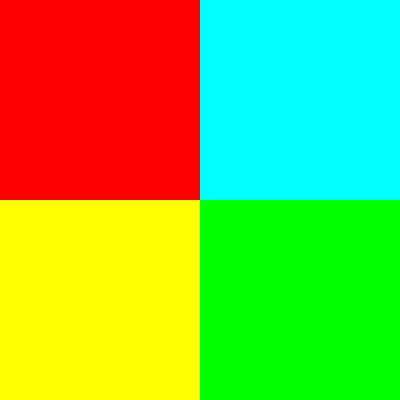

In [25]:
import numpy as np
import cv2 as cv
from PIL import Image

img = np.array([
                [[255 , 000 , 000] , [000 , 255 , 255]]
               ,[[255 , 255 , 000] , [000 , 255 , 000]]
               ])
img = Image.fromarray(img.astype('uint8'),'RGB')
img = img.resize((400,400),resample=Image.NEAREST)
img.show()


## Carregando imagem de uma URL
Script para carregar uma imagem de um URL e pixelar para mostrar os pixels claramente.

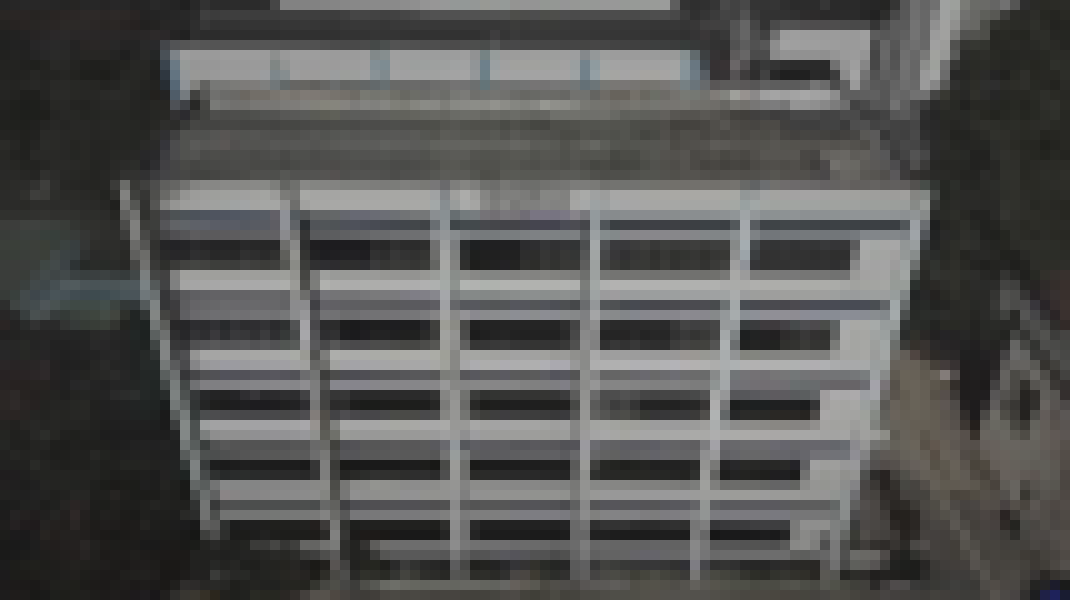

In [21]:
from PIL import Image
import requests
from io import BytesIO
url = "https://www.cnnbrasil.com.br/wp-content/uploads/sites/12/2022/06/unirio-e1655769715522.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((img.width // 10,img.height // 10))
img = img.resize((img.width * 10,img.height * 10), resample=Image.NEAREST)
img.show()


# Testes implementando convolução

https://stackoverflow.com/questions/63036809/how-do-i-use-only-numpy-to-apply-filters-onto-images

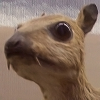

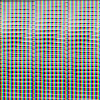

In [30]:
# Assuming the image has channels as the last dimension.
# filter.shape -> (kernel_size, kernel_size, channels)
# image.shape -> (width, height, channels)
def convolve(image, filter, padding = (1, 1)):
    # For this to work neatly, filter and image should have the same number of channels
    # Alternatively, filter could have just 1 channel or 2 dimensions

    if(image.ndim == 2):
        image = np.expand_dims(image, axis=-1) # Convert 2D grayscale images to 3D
    if(filter.ndim == 2):
        filter = np.repeat(np.expand_dims(filter, axis=-1), image.shape[-1], axis=-1) # Same with filters
    if(filter.shape[-1] == 1):
        filter = np.repeat(filter, image.shape[-1], axis=-1) # Give filter the same channel count as the image

    #print(filter.shape, image.shape)
    assert image.shape[-1] == filter.shape[-1]
    size_x, size_y = filter.shape[:2]
    width, height = image.shape[:2]

    output_array = np.zeros(((width - size_x + 2*padding[0]) + 1,
                             (height - size_y + 2*padding[1]) + 1,
                             image.shape[-1])) # Convolution Output: [(W−K+2P)/S]+1

    padded_image = np.pad(image, [
        (padding[0], padding[0]),
        (padding[1], padding[1]),
        (0, 0)
    ])

    for x in range(padded_image.shape[0] - size_x + 1): # -size_x + 1 is to keep the window within the bounds of the image
        for y in range(padded_image.shape[1] - size_y + 1):

            # Creates the window with the same size as the filter
            window = padded_image[x:x + size_x, y:y + size_y]

            # Sums over the product of the filter and the window
            output_values = np.sum(filter * window, axis=(0, 1))

            # Places the calculated value into the output_array
            output_array[x, y] = output_values

    return output_array

#################################################
 #### Utilizando
 ############################################
filter = np.array([
  [1, 1, 1],
  [1, 1, 1],
  [1, 1, 1]
], dtype=np.float32)/9.0 # Box Filter

image = Image.open('image.png')
image.show()
image_arr = np.array(image)

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(convolved_arr), 'RGB') # Convolved Image
convolved.show()